In [2]:
import numpy as np
import pandas as pd

In [3]:
salaries = pd.read_csv("Salaries.csv")

In [4]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
np.mean(salaries['BasePay'])

66325.4488404877

In [7]:
np.max(salaries['OvertimePay'])

245131.88

In [8]:
salaries[salaries['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [9]:
jd = salaries[salaries['EmployeeName'] == 'JOSEPH DRISCOLL']

In [10]:
jd['BasePay'] + jd['OvertimePay'] + jd['OtherPay'] #+ jd['Benefits']

24    270324.91
dtype: float64

In [11]:
jd['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [13]:
salaries[salaries['TotalPayBenefits'] == max(salaries['TotalPayBenefits'])]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [14]:
salaries[salaries['TotalPayBenefits'] == min(salaries['TotalPayBenefits'])]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [30]:
salaries[(salaries['Year'] >= 2011) & 
         (salaries['Year'] <= 2014)][['Year', 'BasePay']].groupby(['Year']).mean()

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


In [36]:
len(salaries.groupby('JobTitle').count())

2159

In [71]:
salaries.groupby('JobTitle')[['JobTitle', 'Id']].count().sort_values(['Id',], 
                                                                     ascending=[0,]).head()[['JobTitle',]]

,JobTitle
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


In [56]:
query = salaries[salaries.Year == 2013].groupby('JobTitle').count()
len(query[query.Id == 1])

202

In [78]:
len(filter(lambda x: 'chief' in x.lower(), salaries.JobTitle))

627

In [95]:
len(filter(lambda x: 'chief' in x.lower().split(), salaries.JobTitle))

477

In [96]:
salaries['title_len'] = map(lambda x: len(x.split()), salaries.JobTitle)

In [101]:
salaries['title_len'] = map(lambda x: len(x), salaries.JobTitle)

In [102]:
salaries[['title_len', 'TotalPayBenefits']].corr() # There is no SIGNIFICANT correlation

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feccbf16410>]],
      dtype=object)

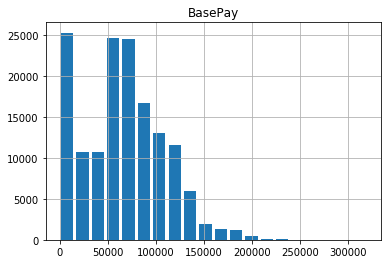

In [109]:
salaries.hist('BasePay', bins = 20, rwidth = 0.8)